# Conditional Routing


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class NumberState(TypedDict):
    number: int
    result: int



In [ ]:
def square_node(state: NumberState) -> NumberState:
    """If positive: square the number"""
    state["result"] = state["number"] ** 2
    return state

def abs_node(state: NumberState) -> NumberState:
    """If negative: take absolute value"""
    state["result"] = abs(state["number"])
    return state

def zero_node(state: NumberState) -> NumberState:
    """If zero: leave as zero"""
    state["result"] = 0
    return state

def route_by_sign(state: NumberState) -> str:
    """Choose next node based on the sign of the number"""
    if state["number"] > 0:
        return "positive_branch"
    elif state["number"] < 0:
        return "negative_branch"
    else:
        return "zero_branch"


In [ ]:
# Build the graph
graph = StateGraph(NumberState)

# Add our transformation nodes
graph.add_node("square_node", square_node)
graph.add_node("abs_node", abs_node)
graph.add_node("zero_node", zero_node)

# A passthrough router node
graph.add_node("router", lambda s: s)

# Link start → router
graph.add_edge(START, "router")

# Conditional edges from router into each branch
graph.add_conditional_edges(
    "router",
    route_by_sign,
    {
        "positive_branch": "square_node",
        "negative_branch": "abs_node",
        "zero_branch":     "zero_node"
    }
)

# All branches lead to END
graph.add_edge("square_node", END)
graph.add_edge("abs_node",    END)
graph.add_edge("zero_node",   END)

# Compile into an executable app
app = graph.compile()


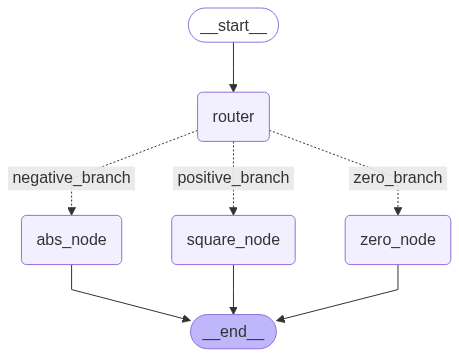

In [ ]:
# (Optional) visualize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
# Test it out:
for test_number in [ 5, -3,  0]:
    state: NumberState = {"number": test_number, "result": None}  # type: ignore
    out = app.invoke(state)
    print(f"Input: {test_number:>2} → Result: {out['result']}")

Input:  5 → Result: 25
Input: -3 → Result: 3
Input:  0 → Result: 0
